# Practice 2

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 固定隨機數種子
np.random.seed(0)


In [97]:
data = np.random.normal(0, 1, 500)

In [98]:
#計算每個點的卡方值(自由度=1)
chisqr = (data - 0)**2 / 1  # μ=0, σ=1

In [99]:
print(np.mean(chisqr))

0.9969597997494775


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_1359/2872943450.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.text(np.mean(chisqr) + 0.2, 0.3, f'$\mu$={np.mean(chisqr):.3f}', fontsize=14, color='C3')


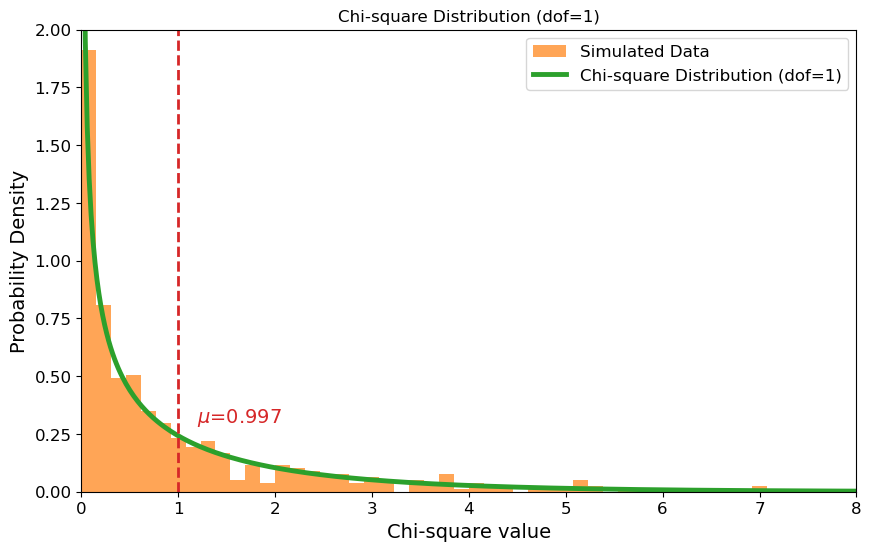

In [100]:
#畫直方圖
plt.figure(figsize=(10, 6))
plt.hist(chisqr, bins=50, density=True, alpha=0.7, label='Simulated Data', color='C1')

#畫理論自由度1的卡方分布
x_vals = np.linspace(0, 10, 500)
plt.plot(x_vals, chi2.pdf(x_vals, df=1), label='Chi-square Distribution (dof=1)', color='C2', lw=3.5)
plt.plot([np.mean(chisqr), np.mean(chisqr)], plt.ylim(), linestyle='--', color="C3", lw=2, label='__no_legend__')
plt.text(np.mean(chisqr) + 0.2, 0.3, f'$\mu$={np.mean(chisqr):.3f}', fontsize=14, color='C3')
plt.xlim(left=0, right=8)
plt.ylim(bottom=0, top=2)
plt.xlabel('Chi-square value', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Probability Density', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Chi-square Distribution (dof=1)')
plt.legend(fontsize=12)
plt.savefig('./fig/output_2_1.pdf', transparent=True)
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_1359/1166227293.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax.text(np.mean(sum_chisqr)/25+0.05, 0.3, f'$\mu$={np.mean(sum_chisqr):.3f}', transform=ax.transAxes,


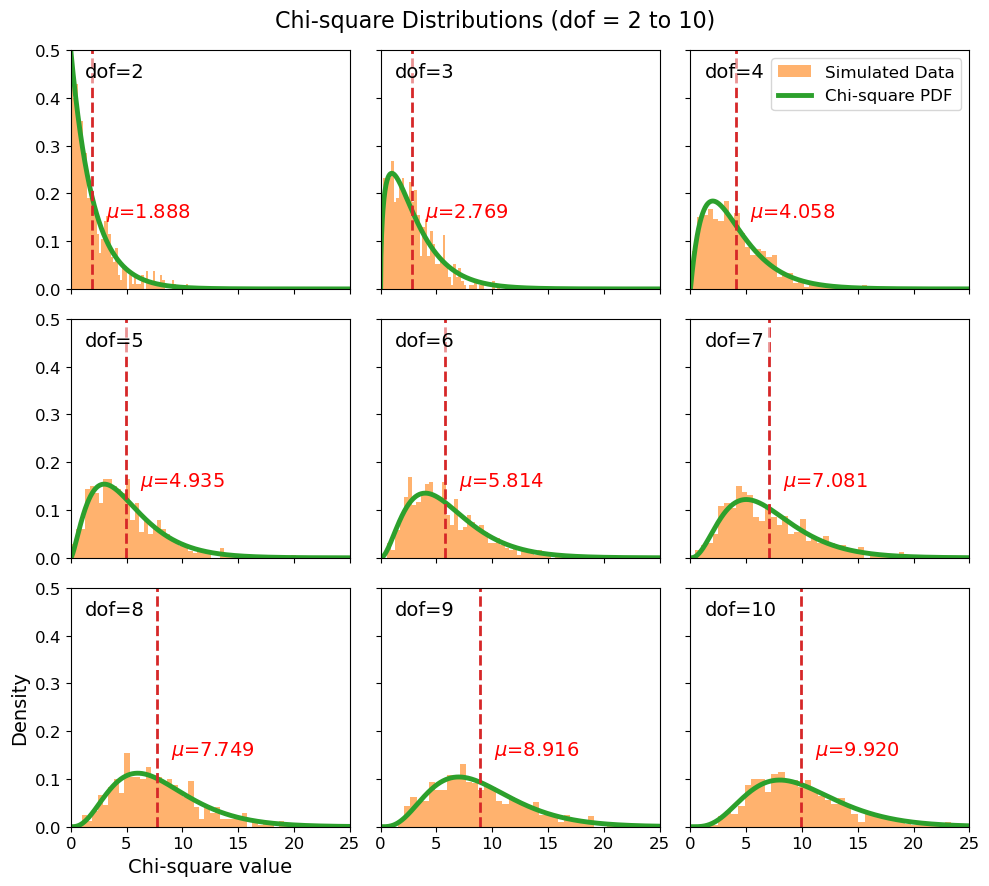

In [101]:
# 設定自由度範圍
dofs = range(2, 11)
# 建立subplots 3*3
fig, axes = plt.subplots(3, 3, figsize=(10, 9), sharex=True, sharey=True)
# 調整子圖間距
plt.subplots_adjust(left=0.03, right=0.97, top=0.95, bottom=0.05, wspace=-0.1, hspace=-0.1)
x_vals = np.linspace(0, 30, 1000)
# 遍歷每個自由度與子圖
for idx, dof in enumerate(dofs):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
 
    # 模擬卡方資料
    sum_chisqr = np.zeros(500)
    for _ in range(dof):
        data = np.random.normal(0, 1, 500)
        sum_chisqr += data**2

    # 畫直方圖
    ax.hist(sum_chisqr, bins=50, density=True, alpha=0.6, label='Simulated Data', color='C1')
    # 畫理論曲線
    ax.plot(x_vals, chi2.pdf(x_vals, df=dof), color='C2', label='Chi-square PDF', lw=3.5)
    ax.text(0.05, 0.95, f'dof={dof}', transform=ax.transAxes, fontsize=14, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax.text(np.mean(sum_chisqr)/25+0.05, 0.3, f'$\mu$={np.mean(sum_chisqr):.3f}', transform=ax.transAxes, 
            fontsize=14, color='red')
    ax.plot([np.mean(sum_chisqr),np.mean(sum_chisqr)], [0, 0.5], color='C3', lw=2, ls='--')
    ax.set_xlim(0, 25)
    # ax.tick_parms(labelsize=12)
    ax.set_ylim(0, 0.5)
    # ax.tick_parms(labelsize=12)
    # ax.set_title(f'dof = {dof}')
    if dof == 4:
        ax.legend(fontsize=12, loc='upper right')
    if dof == 8:
        ax.set_xlabel('Chi-square value', fontsize=14)
        ax.set_ylabel('Density', fontsize=14)
    # print(np.mean(sum_chisqr))
for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)

plt.suptitle('Chi-square Distributions (dof = 2 to 10)', fontsize=16)
plt.tight_layout()  # 調整 layout 以容納 suptitle
plt.savefig('./fig/output_2_2.pdf', transparent=True)
plt.show()




